# Analysis of Bangkok's Airbnb Listings

<img src="./img/airbnb_bangkok.png" alt="drawing" style="width:90%;"/>

## Introduction
---

The rapid growth of Airbnb has revolutionized the way travelers find accommodations, offering many different rental options in cities around the world. This data analysis project focuses on understanding the dynamics of Airbnb listings in Bangkok, a vibrant city known for its cultural heritage, tourist attractions and amazing cuisine. By analyzing various aspects of Airbnb listings, such as pricing, room type, location, and guest reviews, this project is meant to give a deeper understanding of the Airbnb listings in Bangkok and provide insights that can benefit hosts and guests using Airbnb.

**Objectives:**

- **Pricing Analysis**: Examine the distribution of nightly rates and identify factors influencing pricing.
- **Room Type Analysis**: Examine the distribution of different room types (entire home/apt, private room, shared room)
- **Geographical Distribution**: Map listings to visualize popular areas and examine neighborhood-level trends.
- **Minimum Nights Analysis**: Examine the distribution of minimum night stay requirements across listings
- **Review Analysis**: Investigate listing popularity based on the number of reviews

**Dataset:**
This project uses [InsideAirbnb](http://insideairbnb.com) listings data for Bangkok as of December 2023

#### Data Dictionary

| Column                            | Explanation                                                                                                                                                                                        |
| --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| id                                | Airbnb's unique identifier for the listing                                                                                                                                                         |
| name                              |                                                                                                                                                                                                    |
| host\_id                          |                                                                                                                                                                                                    |
| host\_name                        |                                                                                                                                                                                                    |
| neighbourhood\_group              | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                        |
| neighbourhood                     | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                              |
| latitude                          | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                      |
| longitude                         | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                      |
| room\_type                        |                                                                                                                                                                                                    |
| price                             | daily price in local currency. Note, $ sign may be used despite locale                                                                                                                             |
| minimum\_nights                   | minimum number of night stay for the listing (calendar rules may be different)                                                                                                                     |
| number\_of\_reviews               | The number of reviews the listing has                                                                                                                                                              |
| last\_review                      | The date of the last/newest review                                                                                                                                                                 |
| calculated\_host\_listings\_count | The number of listings the host has in the current scrape, in the city/region geography.                                                                                                           |
| availability\_365                 | avaliability\_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host. |
| number\_of\_reviews\_ltm          | The number of reviews the listing has (in the last 12 months)                                                                                                                                      |
| license                           |                                                                                                                                                                                                    |
[Source](http://insideairbnb.com/get-the-data.html) and [license](https://creativecommons.org/licenses/by/4.0/) of dataset. 

## Data Wrangling and Cleaning
---

### Importing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Setting the max rows into 15 for display
pd.set_option('display.max_Rows', 15)

# Loading in data
listing = pd.read_csv("data/listings.csv", index_col=0)
listing.info()
listing.head()

<class 'pandas.core.frame.DataFrame'>
Index: 22104 entries, 27934 to 1053584060635211891
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            22104 non-null  object 
 1   host_id                         22104 non-null  int64  
 2   host_name                       22103 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   22104 non-null  object 
 5   latitude                        22104 non-null  float64
 6   longitude                       22104 non-null  float64
 7   room_type                       22104 non-null  object 
 8   price                           21582 non-null  float64
 9   minimum_nights                  22104 non-null  int64  
 10  number_of_reviews               22104 non-null  int64  
 11  last_review                     14162 non-null  object 
 12  reviews_per_month  

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1903.0,3,64,2020-01-06,0.45,2,329,0,NaN
27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,NaN,NaN,2,0,0,NaN
28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0,NaN,NaN,1,0,0,NaN
820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,822284,Rae And Charlie,NaN,Bang Sue,13.83026,100.52082,Entire home/apt,700.0,7,13,2018-02-14,0.10,8,349,0,NaN
35780,Rental unit in Bangkok · ★4.75 · 1 bedroom · 1...,153730,Sirilak,NaN,Din Daeng,13.78823,100.57256,Private room,1286.0,14,4,2023-04-03,0.04,1,327,2,NaN


### Cleaning the data

In [2]:
# Replacing NaN values with 0
values = {"price": 0, "reviews_per_month": 0}
listing.fillna(value = values, inplace=True)
listing.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1903.0,3,64,2020-01-06,0.45,2,329,0,NaN
27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,NaN,0.00,2,0,0,NaN
28745,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,123784,Familyroom,NaN,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0,NaN,0.00,1,0,0,NaN
820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,822284,Rae And Charlie,NaN,Bang Sue,13.83026,100.52082,Entire home/apt,700.0,7,13,2018-02-14,0.10,8,349,0,NaN
35780,Rental unit in Bangkok · ★4.75 · 1 bedroom · 1...,153730,Sirilak,NaN,Din Daeng,13.78823,100.57256,Private room,1286.0,14,4,2023-04-03,0.04,1,327,2,NaN


### Dealing with outliers

Upon conducting a preliminary analysis, we can see that some variables were oddly distributed. For instance, the distributions of price and minimum_nights show evidence of the presence of outliers, which may skew our data.

In [3]:
listing['price'].describe()

count      22104.000000
mean        3031.197068
std        17478.270133
min            0.000000
25%          974.000000
50%         1500.000000
75%         2599.000000
max      1000000.000000
Name: price, dtype: float64

In [4]:
listing['minimum_nights'].describe()

count    22104.000000
mean        13.874186
std         45.670650
min          1.000000
25%          1.000000
50%          1.000000
75%         10.000000
max       1115.000000
Name: minimum_nights, dtype: float64

We can notice that 75% of price values are below ฿2599.00 but we have a minimum value of ฿0 and a maximum value of ฿1000000.00. As for the number of minimum nights, we can also notice some disparity. 75% of listings have a minimum night stay of 10 or less nights but the maximum value goes as high as 1115 nights!

Therefore, to prevent the data from being distorted by outliers, we are going to drop values that surpass those mentioned above.

In [5]:
# Updating dataset by filtering out free listings and listings over ฿2599
listing = listing[(listing.price > 0) & (listing.price <= 2599)]

In [6]:
# Updating dataset by filtering out listings with a over 10 minimum night stay requirement
listing = listing[listing.minimum_nights <= 10]
listing.info()
listing.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11378 entries, 27934 to 1053470219776815970
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11378 non-null  object 
 1   host_id                         11378 non-null  int64  
 2   host_name                       11377 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   11378 non-null  object 
 5   latitude                        11378 non-null  float64
 6   longitude                       11378 non-null  float64
 7   room_type                       11378 non-null  object 
 8   price                           11378 non-null  float64
 9   minimum_nights                  11378 non-null  int64  
 10  number_of_reviews               11378 non-null  int64  
 11  last_review                     7543 non-null   object 
 12  reviews_per_month  

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
27934,Condo in Samsen Nai · ★4.85 · 1 bedroom · 1 be...,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,1903.0,3,64,2020-01-06,0.45,2,329,0,NaN
27979,Rental unit in Bangkok · 1 bedroom · 2 beds · ...,120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,NaN,0.00,2,0,0,NaN
820395,Guesthouse in Bangkok · ★4.77 · 1 bedroom · 1 ...,822284,Rae And Charlie,NaN,Bang Sue,13.83026,100.52082,Entire home/apt,700.0,7,13,2018-02-14,0.10,8,349,0,NaN
822214,Home in Bangkok · ★4.84 · 2 bedrooms · 3 beds ...,822284,Rae And Charlie,NaN,Bang Sue,13.83148,100.52307,Entire home/apt,1200.0,3,27,2023-10-06,0.21,8,157,7,NaN
48736,Rental unit in Bangkok · 1 bedroom · 1 bed · 1...,222005,Athitaya,NaN,Rat Burana,13.68556,100.49535,Private room,1559.0,3,1,2014-02-03,0.01,1,365,0,NaN


After removing all the listings in our dataset based on the criteria, we can see that the total number of entries went from 22104 to 11378, which means there are 10726 listings that are potential outliers. Now that our data is cleaned and filtered, we can begin our analysis.

## Exploratory Data Analysis 🔎
---

### Pricing Analysis

Some key questions to address:
- What are the average nightly and monthly rates for Airbnb listings in Bangkok?
- How do prices vary across different neighborhoods?
- How do prices vary across different room types?

[Note]: Price is in local currency (Thai Baht ฿) 

#### 1. Average nightly and monthly rates

In [7]:
# Calculating the average price and round to nearest 2 decimal places
avg_price = round(listing['price'].mean(), 2)

# Adding a new column to the listing dataset, price_per_month
listing["price_per_month"] = listing["price"] * 365 / 12

# Calculating the average price per month and round to nearest 2 decimal places
avg_monthly_price = round(listing['price_per_month'].mean(), 2)

print("Average nightly rate: ฿" + str(avg_price))
print("Average monthly rate: ฿" + str(avg_monthly_price))

Average nightly rate: ฿1329.92
Average monthly rate: ฿40451.76


#### 2. Average prices for each neighborhood

In [8]:
# Selecting columns neighbourhood and price
nh_prices = listing[['neighbourhood', 'price']]

# Grouping neighbourhood and then aggreating the prices based on mean
nh_prices = nh_prices.groupby("neighbourhood")['price'].agg('mean')

# Resetting index of table
nh_prices = nh_prices.reset_index()

nh_prices

,neighbourhood,price
0,Bang Bon,1230.000000
1,Bang Kapi,1086.408867
2,Bang Khae,999.964912
3,Bang Khen,1109.685393
4,Bang Kho laen,1094.808219
...,...,...
45,Thon buri,1283.530973
46,Thung khru,825.933333
47,Vadhana,1550.452648
48,Wang Thong Lang,1037.240506


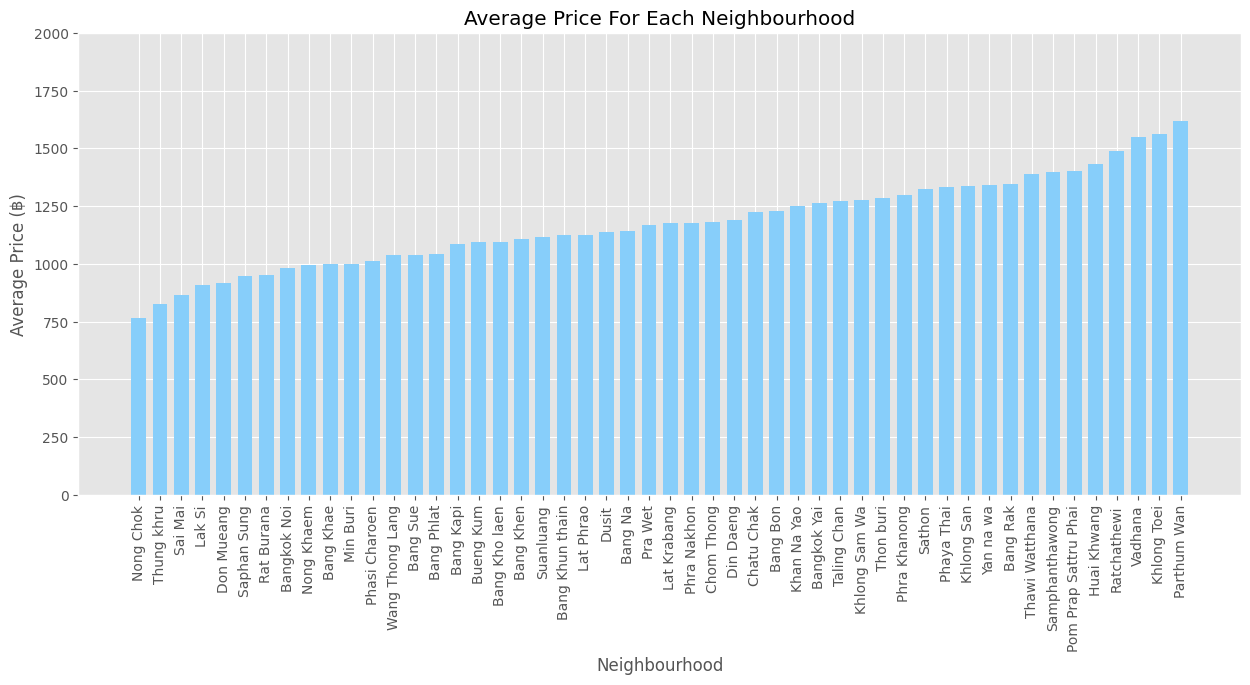

In [15]:
# Sorting prices in ascending order
nh_prices = nh_prices.sort_values(by = 'price')

# Create a Figure and an Axes with plt.subplots
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Plotting average price against each neighbourhood
fig.set_size_inches(15, 6)
ax.bar(nh_prices["neighbourhood"], nh_prices['price'], color = 'lightskyblue', width = 0.7)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Average Price (฿)")
ax.set_ylim(None, 2000)
ax.set_title("Average Price For Each Neighbourhood")
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)

plt.show()

We can see that the average price for each neighbourhood falls somewhere in between the range of ฿750 to ฿1750, with Pathum Wan being the most expensive district to rent at.

#### 3. Average prices for each room type

In [10]:
# Selecting columns room_type and price
rt_prices = listing[['room_type', 'price']]

# Grouping room_type and then aggreating the prices based on mean
rt_prices = rt_prices.groupby("room_type")['price'].agg('mean')

# Resetting index of table
rt_prices = rt_prices.reset_index()

rt_prices

,room_type,price
0,Entire home/apt,1492.610594
1,Hotel room,1274.156627
2,Private room,1220.217409
3,Shared room,630.648485


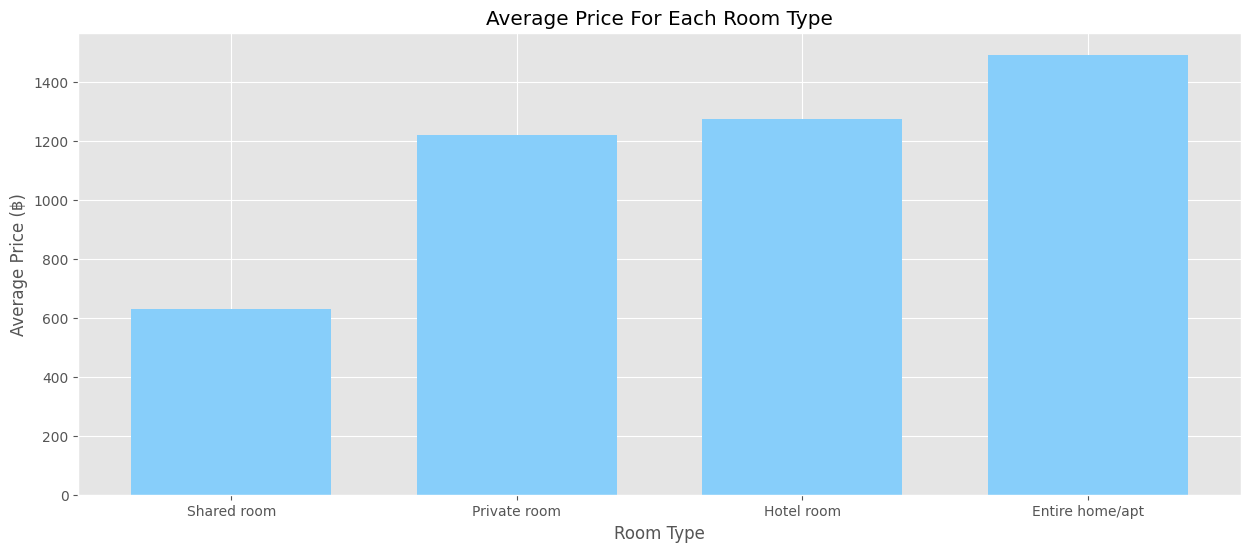

In [16]:
# Sorting prices in ascending order
rt_prices = rt_prices.sort_values(by = 'price')

# Create a Figure and an Axes with plt.subplots
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Plotting average price against each neighbourhood
fig.set_size_inches(15, 6)
ax.bar(rt_prices["room_type"], rt_prices['price'], color = 'lightskyblue', width = 0.7)
ax.set_xlabel("Room Type")
ax.set_ylabel("Average Price (฿)")
ax.set_title("Average Price For Each Room Type")

plt.show()

The average price for entire home/apt is the most expensive, being close to just ฿1500 a night.

### Room Type Analysis

Some key questions to address:
- Which type of room is listed the most?
- What is the distribution of room types in Bangkok's Airbnb listings?

#### 1. Count of each room type

In [12]:
# Counting frequencies for each room type
room_frequencies = listing["room_type"].value_counts()
room_frequencies = room_frequencies.reset_index()

room_frequencies

,room_type,count
0,Entire home/apt,5588
1,Private room,4963
2,Shared room,495
3,Hotel room,332


The room type that is listed the most is entire home/apt, with 5588 listings in total. 

#### 2. Room type distribution

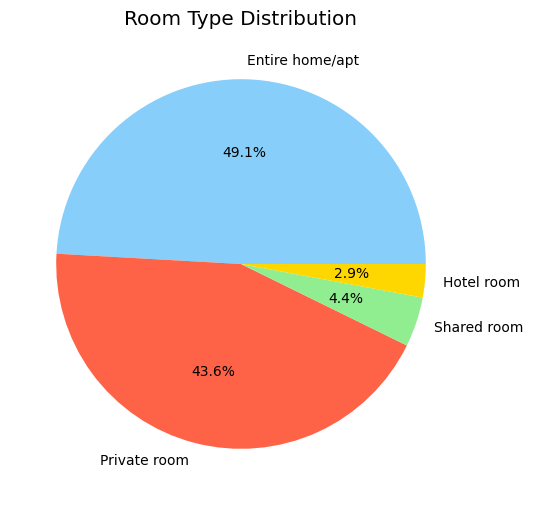

In [13]:
# Create a Figure and an Axes with plt.subplots
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Plotting a pie chart of room frequencies
fig.set_size_inches(15, 6)
colors = ['lightskyblue', 'tomato', 'lightgreen', 'gold']
ax.pie(x = room_frequencies['count'], labels = room_frequencies["room_type"], autopct = '%1.1f%%', colors = colors)
ax.set_title("Room Type Distribution")

plt.show()

From the figure above, we can see that entire homes/apt account for the majority of airbnb listings in Bangkok, taking up 49.1% of the total, while private rooms, with 43.6%, also have a considerable share.